# Reshaping

In [2]:
import pandas as pd

In [12]:
df = pd.read_excel("reshaping.xlsx")

display(df)

,Estudante,Categoria,Semana,Tópico,Nota
0,Maria,Testes,1,1. Python,100
1,Maria,Projeto,1,1. Python,100
2,Maria,Testes,1,2. GitHub,70
3,Maria,Projeto,1,2. GitHub,70
4,Maria,Testes,2,3. Matplotlib,80
5,Maria,Projeto,2,3. Matplotlib,70
6,Maria,Testes,2,4. SQL,80
7,Maria,Projeto,2,4. SQL,70
8,Maria,Testes,3,5. NumPy,60
9,Maria,Projeto,3,5. NumPy,60


## Pivot

Uma operação `pivot` em um dataframe é uma operação que reorganiza os dados de um dataframe, alterando a forma dos dados.

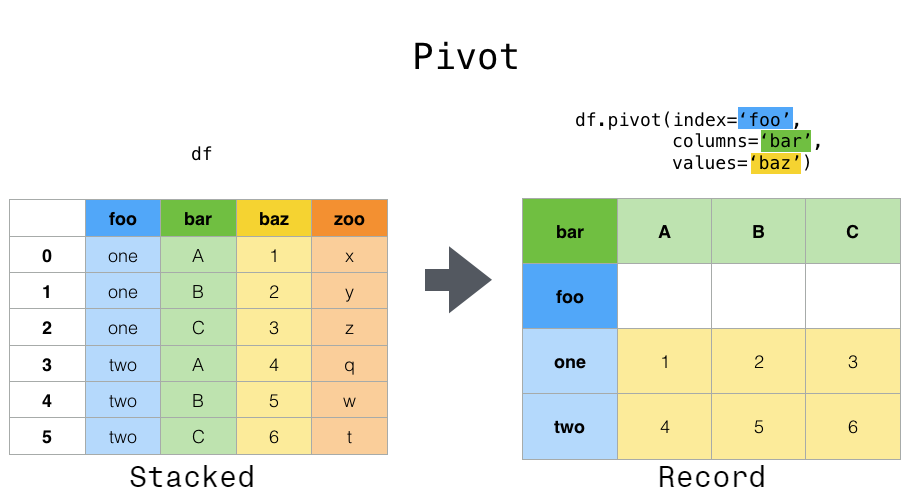

In [43]:
df_pivot = df.pivot_table(index=["Estudante", "Categoria"], columns=["Semana", "Tópico"], values = "Nota", aggfunc = "mean")

df_pivot

Semana                      1                       2               3         \
Tópico              1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO   
Estudante Categoria                                                            
João      Projeto        80.0      90.0          70.0   80.0     90.0   80.0   
          Testes        100.0      90.0          60.0   70.0     80.0   70.0   
Maria     Projeto       100.0      70.0          70.0   70.0     60.0   80.0   
          Testes        100.0      70.0          80.0   80.0     60.0   90.0   

Semana                      4                 
Tópico              7. Pandas 8. Estatística  
Estudante Categoria                           
João      Projeto       100.0           90.0  
          Testes         70.0           80.0  
Maria     Projeto        70.0           80.0  
          Testes         70.0           80.0

In [50]:
df.groupby(by = ["Estudante", "Semana", "Tópico"])[["Nota"]].mean()

Nota
Estudante Semana Tópico               
João      1      1. Python        90.0
                 2. GitHub        90.0
          2      3. Matplotlib    65.0
                 4. SQL           75.0
          3      5. NumPy         85.0
                 6. POO           75.0
          4      7. Pandas        85.0
                 8. Estatística   85.0
Maria     1      1. Python       100.0
                 2. GitHub        70.0
          2      3. Matplotlib    75.0
                 4. SQL           75.0
          3      5. NumPy         60.0
                 6. POO           85.0
          4      7. Pandas        70.0
                 8. Estatística   80.0

In [49]:
df.groupby(by = ["Estudante", "Semana", "Tópico"])[["Nota"]].mean().unstack(level = [1, 2])

Nota                                                           \
Semana            1                       2               3                4   
Tópico    1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO 7. Pandas   
Estudante                                                                      
João           90.0      90.0          65.0   75.0     85.0   75.0      85.0   
Maria         100.0      70.0          75.0   75.0     60.0   85.0      70.0   

                          
Semana                    
Tópico    8. Estatística  
Estudante                 
João                85.0  
Maria               80.0

In [52]:
min(20, 8)

8

In [20]:
df_pivot.shape

(2, 16)

In [5]:
df_pivot.index

Index(['João', 'Maria'], dtype='object', name='Estudante')

In [25]:
df_pivot.columns

MultiIndex([( 'Testes', 1,      '1. Python'),
            ('Projeto', 1,      '1. Python'),
            ( 'Testes', 1,      '2. GitHub'),
            ('Projeto', 1,      '2. GitHub'),
            ( 'Testes', 2,  '3. Matplotlib'),
            ('Projeto', 2,  '3. Matplotlib'),
            ( 'Testes', 2,         '4. SQL'),
            ('Projeto', 2,         '4. SQL'),
            ( 'Testes', 3,       '5. NumPy'),
            ('Projeto', 3,       '5. NumPy'),
            ( 'Testes', 3,         '6. POO'),
            ('Projeto', 3,         '6. POO'),
            ( 'Testes', 4,      '7. Pandas'),
            ('Projeto', 4,      '7. Pandas'),
            ( 'Testes', 4, '8. Estatística'),
            ('Projeto', 4, '8. Estatística')],
           names=['Categoria', 'Semana', 'Tópico'])

In [27]:
df_pivot_stack = df_pivot.stack(level = [0, 1], future_stack = True)
df_pivot_stack

Tópico                      1. Python  2. GitHub  3. Matplotlib  4. SQL  \
Estudante Categoria Semana                                                
João      Testes    1           100.0       90.0            NaN     NaN   
          Projeto   1            80.0       90.0            NaN     NaN   
          Testes    2             NaN        NaN           60.0    70.0   
          Projeto   2             NaN        NaN           70.0    80.0   
          Testes    3             NaN        NaN            NaN     NaN   
          Projeto   3             NaN        NaN            NaN     NaN   
          Testes    4             NaN        NaN            NaN     NaN   
          Projeto   4             NaN        NaN            NaN     NaN   
Maria     Testes    1           100.0       70.0            NaN     NaN   
          Projeto   1           100.0       70.0            NaN     NaN   
          Testes    2             NaN        NaN           80.0    80.0   
          Projeto   2             NaN        NaN           70.0    70.0   
          Testes    3             NaN        NaN            NaN     NaN   
          Projeto   3             NaN        NaN            NaN     NaN   
          Testes    4             NaN        NaN            NaN     NaN   
          Projeto   4             NaN        NaN            NaN     NaN   

Tópico                      5. NumPy  6. POO  7. Pandas  8. Estatística  
Estudante Categoria Semana                                               
João      Testes    1            NaN     NaN        NaN             NaN  
          Projeto   1            NaN     NaN        NaN             NaN  
          Testes    2            NaN     NaN        NaN             NaN  
          Projeto   2            NaN     NaN        NaN             NaN  
          Testes    3           80.0    70.0        NaN             NaN  
          Projeto   3           90.0    80.0        NaN             NaN  
          Testes    4            NaN     NaN       70.0            80.0  
          Projeto   4            NaN     NaN      100.0            90.0  
Maria     Testes    1            NaN     NaN        NaN             NaN  
          Projeto   1            NaN     NaN        NaN             NaN  
          Testes    2            NaN     NaN        NaN             NaN  
          Projeto   2            NaN     NaN        NaN             NaN  
          Testes    3           60.0    90.0        NaN             NaN  
          Projeto   3           60.0    80.0        NaN             NaN  
          Testes    4            NaN     NaN       70.0            80.0  
          Projeto   4            NaN     NaN       70.0            80.0

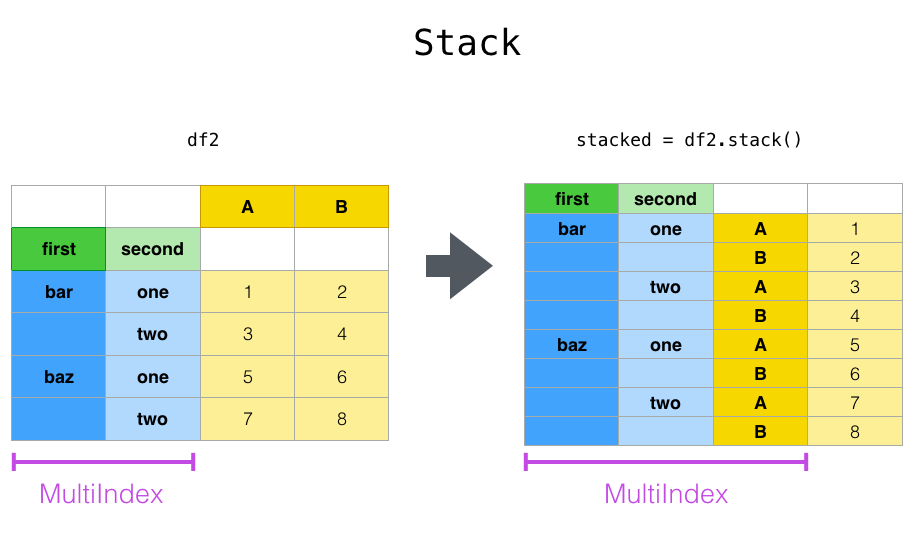

In [37]:
df_pivot_stack.index = nova_ordem

In [38]:
df_pivot_stack

Tópico,1. Python,2. GitHub,3. Matplotlib,4. SQL,5. NumPy,6. POO,7. Pandas,8. Estatística
"(1, Testes, João)",100.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
"(1, Projeto, João)",80.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
"(2, Testes, João)",NaN,NaN,60.0,70.0,NaN,NaN,NaN,NaN
"(2, Projeto, João)",NaN,NaN,70.0,80.0,NaN,NaN,NaN,NaN
"(3, Testes, João)",NaN,NaN,NaN,NaN,80.0,70.0,NaN,NaN
"(3, Projeto, João)",NaN,NaN,NaN,NaN,90.0,80.0,NaN,NaN
"(4, Testes, João)",NaN,NaN,NaN,NaN,NaN,NaN,70.0,80.0
"(4, Projeto, João)",NaN,NaN,NaN,NaN,NaN,NaN,100.0,90.0
"(1, Testes, Maria)",100.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
"(1, Projeto, Maria)",100.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
nova_ordem = [(c, b, a) for (a, b, c) in df_pivot_stack.index]
nova_ordem

[(1, 'Testes', 'João'),
 (1, 'Projeto', 'João'),
 (2, 'Testes', 'João'),
 (2, 'Projeto', 'João'),
 (3, 'Testes', 'João'),
 (3, 'Projeto', 'João'),
 (4, 'Testes', 'João'),
 (4, 'Projeto', 'João'),
 (1, 'Testes', 'Maria'),
 (1, 'Projeto', 'Maria'),
 (2, 'Testes', 'Maria'),
 (2, 'Projeto', 'Maria'),
 (3, 'Testes', 'Maria'),
 (3, 'Projeto', 'Maria'),
 (4, 'Testes', 'Maria'),
 (4, 'Projeto', 'Maria')]

In [32]:
for a, b, c in df_pivot_stack.index:
    pass

In [28]:
df_pivot_stack.unstack(level = [1, 2])

Tópico    1. Python                                                       \
Categoria    Testes Projeto Testes Projeto Testes Projeto Testes Projeto   
Semana            1       1      2       2      3       3      4       4   
Estudante                                                                  
João          100.0    80.0    NaN     NaN    NaN     NaN    NaN     NaN   
Maria         100.0   100.0    NaN     NaN    NaN     NaN    NaN     NaN   

Tópico    2. GitHub          ... 7. Pandas         8. Estatística          \
Categoria    Testes Projeto  ...    Testes Projeto         Testes Projeto   
Semana            1       1  ...         4       4              1       1   
Estudante                    ...                                            
João           90.0    90.0  ...      70.0   100.0            NaN     NaN   
Maria          70.0    70.0  ...      70.0    70.0            NaN     NaN   

Tópico                                                  
Categoria Testes Projeto Testes Projeto Testes Projeto  
Semana         2       2      3       3      4       4  
Estudante                                               
João         NaN     NaN    NaN     NaN   80.0    90.0  
Maria        NaN     NaN    NaN     NaN   80.0    80.0  

[2 rows x 64 columns]

In [29]:
df_pivot.stack(level=0).index

C:\Users\AriosvaldoBarros\AppData\Local\Temp\ipykernel_13332\3153054886.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_pivot.stack(level=0).index


MultiIndex([( 'João', 'Projeto'),
            ( 'João',  'Testes'),
            ('Maria', 'Projeto'),
            ('Maria',  'Testes')],
           names=['Estudante', 'Categoria'])

In [8]:
df_pivot.stack(level=0).columns

MultiIndex([(1,      '1. Python'),
            (1,      '2. GitHub'),
            (2,  '3. Matplotlib'),
            (2,         '4. SQL'),
            (3,       '5. NumPy'),
            (3,         '6. POO'),
            (4,      '7. Pandas'),
            (4, '8. Estatística')],
           names=['Semana', 'Tópico'])

In [9]:
df_pivot.stack(level=0).unstack(level=0)

Semana            1                                   2                     \
Tópico    1. Python       2. GitHub       3. Matplotlib       4. SQL         
Estudante      João Maria      João Maria          João Maria   João Maria   
Categoria                                                                    
Projeto          80   100        90    70            70    70     80    70   
Testes          100   100        90    70            60    80     70    80   

Semana           3                            4                             
Tópico    5. NumPy       6. POO       7. Pandas       8. Estatística        
Estudante     João Maria   João Maria      João Maria           João Maria  
Categoria                                                                   
Projeto         90    60     80    80       100    70             90    80  
Testes          80    60     70    90        70    70             80    80

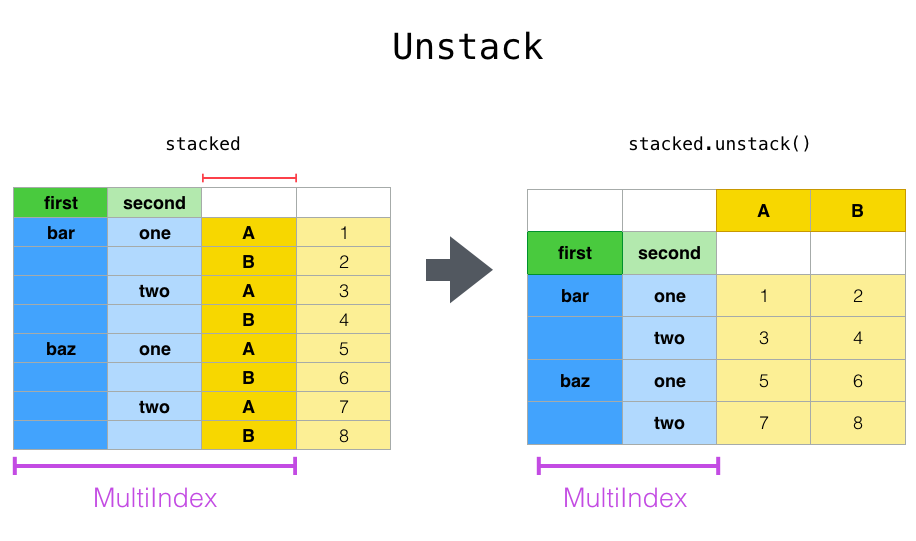

In [10]:
df_pivot.stack(level=0).unstack(level=1)

Semana            1                                     2                 \
Tópico    1. Python        2. GitHub        3. Matplotlib         4. SQL   
Categoria   Projeto Testes   Projeto Testes       Projeto Testes Projeto   
Estudante                                                                  
João             80    100        90     90            70     60      80   
Maria           100    100        70     70            70     80      70   

Semana                  3                               4         \
Tópico           5. NumPy         6. POO        7. Pandas          
Categoria Testes  Projeto Testes Projeto Testes   Projeto Testes   
Estudante                                                          
João          70       90     80      80     70       100     70   
Maria         80       60     60      80     90        70     70   

Semana                           
Tópico    8. Estatística         
Categoria        Projeto Testes  
Estudante                        
João                  90     80  
Maria                 80     80

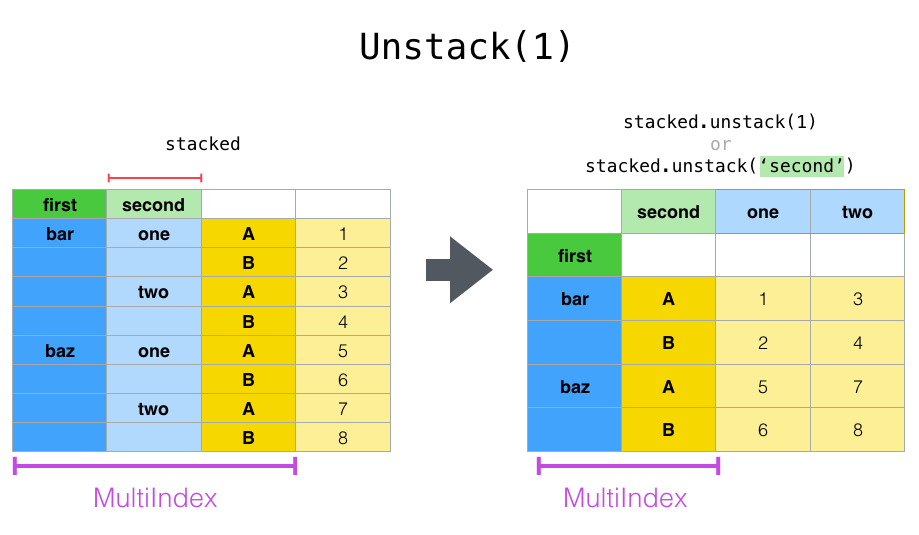

In [11]:
df_pivot.stack(level=0).unstack()

Semana            1                                     2                 \
Tópico    1. Python        2. GitHub        3. Matplotlib         4. SQL   
Categoria   Projeto Testes   Projeto Testes       Projeto Testes Projeto   
Estudante                                                                  
João             80    100        90     90            70     60      80   
Maria           100    100        70     70            70     80      70   

Semana                  3                               4         \
Tópico           5. NumPy         6. POO        7. Pandas          
Categoria Testes  Projeto Testes Projeto Testes   Projeto Testes   
Estudante                                                          
João          70       90     80      80     70       100     70   
Maria         80       60     60      80     90        70     70   

Semana                           
Tópico    8. Estatística         
Categoria        Projeto Testes  
Estudante                        
João                  90     80  
Maria                 80     80

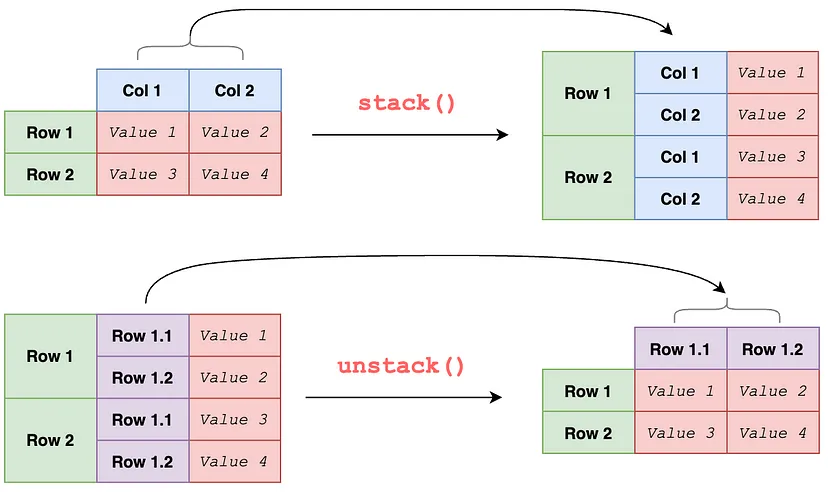

## Pivot table

Uma operação de `pivot_table` é uma operação de agregação que toma uma tabela de dados e a transforma em uma tabela de resumo. A operação é útil para resumir e reorganizar dados. A diferença entre `pivot` e `pivot_table` é que `pivot_table` é uma operação de agregação, enquanto `pivot` é uma operação de reorganização.

In [10]:
df.pivot(index=["Estudante"], columns=["Semana", "Tópico"], values="Nota")

ValueError: Index contains duplicate entries, cannot reshape

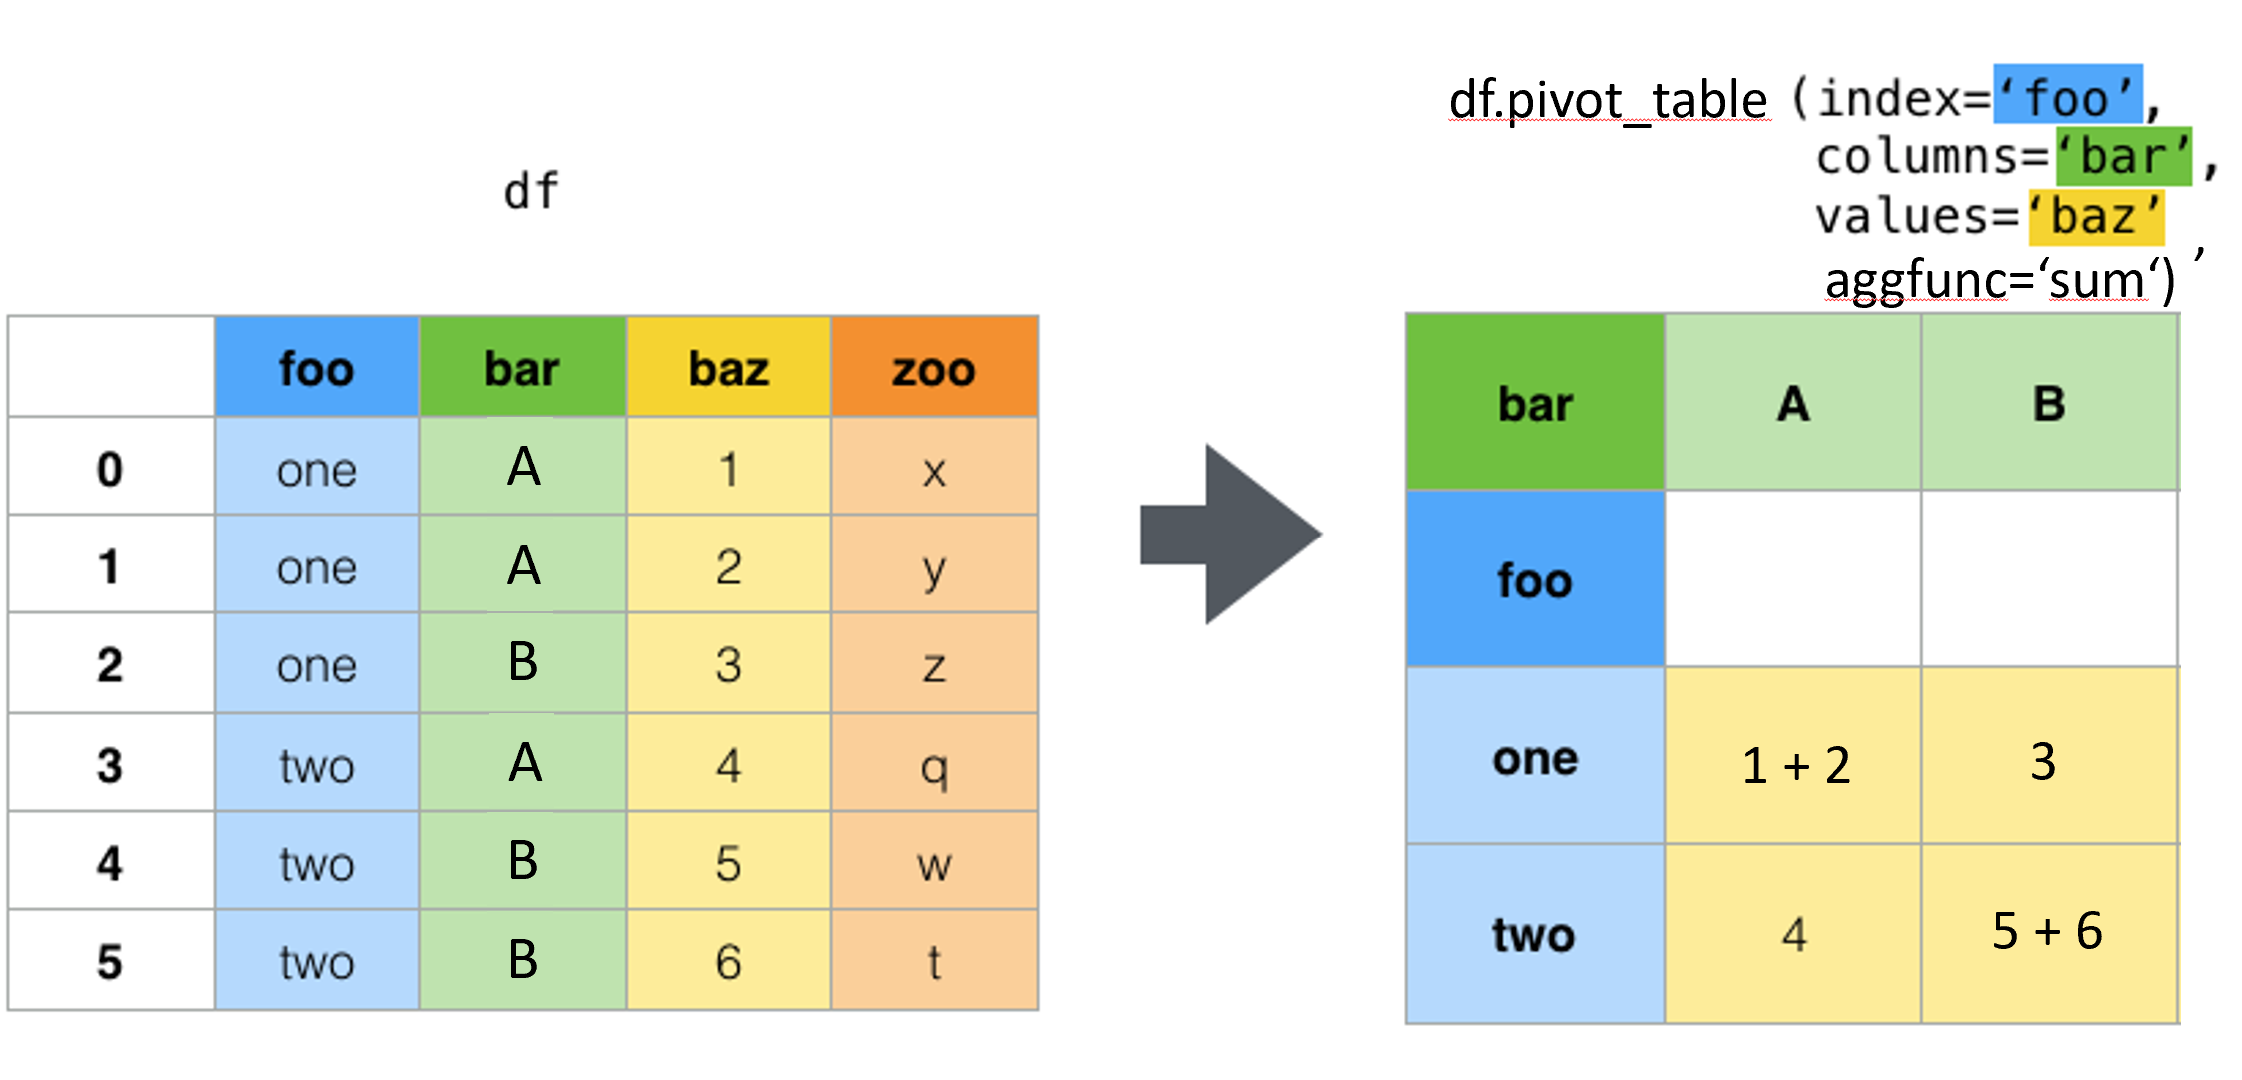

In [13]:
df.pivot_table(index=["Estudante"], columns=["Semana", "Tópico"], values="Nota")

Semana            1                       2               3                4  \
Tópico    1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO 7. Pandas   
Estudante                                                                      
João             90        90            65     75       85     75        85   
Maria           100        70            75     75       60     85        70   

Semana                    
Tópico    8. Estatística  
Estudante                 
João                  85  
Maria                 80

In [14]:
df.pivot_table(index=["Estudante"], columns=["Semana", "Tópico"], values="Nota", aggfunc="count")

Semana            1                       2               3                4  \
Tópico    1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO 7. Pandas   
Estudante                                                                      
João              2         2             2      2        2      2         2   
Maria             2         2             2      2        2      2         2   

Semana                    
Tópico    8. Estatística  
Estudante                 
João                   2  
Maria                  2

In [15]:
df.pivot_table(index=["Estudante"], columns=["Semana", "Tópico"], values="Nota", aggfunc="sum")

Semana            1                       2               3                4  \
Tópico    1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO 7. Pandas   
Estudante                                                                      
João            180       180           130    150      170    150       170   
Maria           200       140           150    150      120    170       140   

Semana                    
Tópico    8. Estatística  
Estudante                 
João                 170  
Maria                160

In [16]:
# mesmo resultado com groupby
df.groupby(["Estudante", "Semana", "Tópico"])["Nota"].mean()

Estudante  Semana  Tópico        
João       1       1. Python          90.0
                   2. GitHub          90.0
           2       3. Matplotlib      65.0
                   4. SQL             75.0
           3       5. NumPy           85.0
                   6. POO             75.0
           4       7. Pandas          85.0
                   8. Estatística     85.0
Maria      1       1. Python         100.0
                   2. GitHub          70.0
           2       3. Matplotlib      75.0
                   4. SQL             75.0
           3       5. NumPy           60.0
                   6. POO             85.0
           4       7. Pandas          70.0
                   8. Estatística     80.0
Name: Nota, dtype: float64

In [17]:
df.groupby(["Estudante", "Semana", "Tópico"])["Nota"].mean().unstack(level=[1, 2])

Semana            1                       2               3                4  \
Tópico    1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO 7. Pandas   
Estudante                                                                      
João           90.0      90.0          65.0   75.0     85.0   75.0      85.0   
Maria         100.0      70.0          75.0   75.0     60.0   85.0      70.0   

Semana                    
Tópico    8. Estatística  
Estudante                 
João                85.0  
Maria               80.0

Como escolher entre `pivot_table` e `groupby`? A escolha depende do usuário. Como mostrado acima, `pivot_table` é uma operação de reorganização e agregação, enquanto `groupby` é uma operação de agregação. Se o usuário deseja reorganizar os dados, então `pivot_table` é a escolha. Se o usuário deseja apenas agregar os dados, então `groupby` é a escolha. 